In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pyart
from pyart.io.sband_archive import read_sband_archive

In [2]:
def get_radar_info(filename, radar_info):
    """根据雷达名称找雷达的经纬度信息
    :param filename(str): 雷达数据文件名
    :param radar_info(json): 存储雷达站点信息数据
    :return lat(deg), lon(deg), elev(m)
    """
    import os

    name = os.path.basename(filename)
    station_id = [int(name[idx:idx+4]) for idx in range(len(name)-4) if name[idx:idx+4].isdigit()][0]

    if station_id not in radar_info.index:
        raise ValueError(f'没有检索到相关雷达站点信息! {station_id}')

    return radar_info.loc[station_id, 'Latitude'], radar_info.loc[station_id, 'Longitude'], radar_info.loc[station_id, 'Elevation']

In [78]:
# 雷达文件和底图
filename = 'Z_RADR_I_Z9515_20160623063100_O_DOR_SA_CAP.bin'
#shpfn = 'data/shps/cnhimap.shp'

# 读取雷达反射率
sweep = 0    # 体扫仰角序号
field = 'reflectivity'
radar_info = pd.read_json('/Users/yanglee/Documents/Works/2020/江苏省局/data/radar_info.json')

In [79]:
radar = read_sband_archive(filename, station=get_radar_info(filename, radar_info))

/Users/yanglee/.local/lib/python3.7/site-packages/pyart/io/sband_archive.py:183: UserWarning: Gate spacing is not constant, interpolating data in scans [0, 2, 4, 5, 6, 7, 8, 9, 10] for moment REF.
  UserWarning)


In [94]:
x = (-200000.0, 200000.0)
y = (-200000.0, 200000.0)
z = (10, 20000)
gshape = (50, 401, 401)
# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked(field)

grid = pyart.map.grid_from_radars((radar,),
                                  gatefilters=(gatefilter,),
                                  grid_shape=gshape,
                                  grid_limits=(z, y, x),
                                  fields=[field]
                                 )

/Users/yanglee/.local/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:177: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


In [5]:
from pyart.graph.gridmapdisplay import GridMapDisplay

In [95]:
display = GridMapDisplay(grid)

/Users/yanglee/.local/lib/python3.7/site-packages/pyart/graph/gridmapdisplay.py:274: UserWarning: No projection was defined for the axes. Overridding defined axes and using default projection <cartopy.crs.Mercator object at 0x1159e9d00>
  "projection "+str(projection))


(33.4, 34.6)

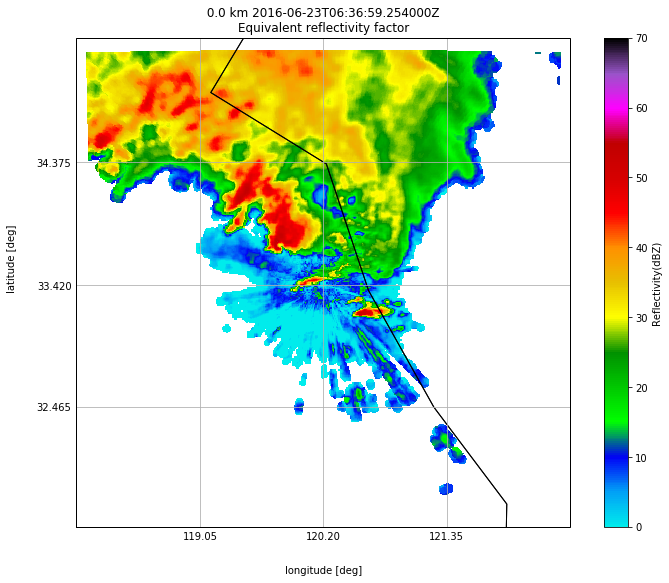

In [96]:
fig, ax = plt.subplots(figsize=(12, 9))

display.plot_grid('reflectivity', vmin=0, vmax=70, cmap='pyart_NWSRef')

ax.set_xlim([119.3, 120.5])
ax.set_ylim([33.4, 34.6])

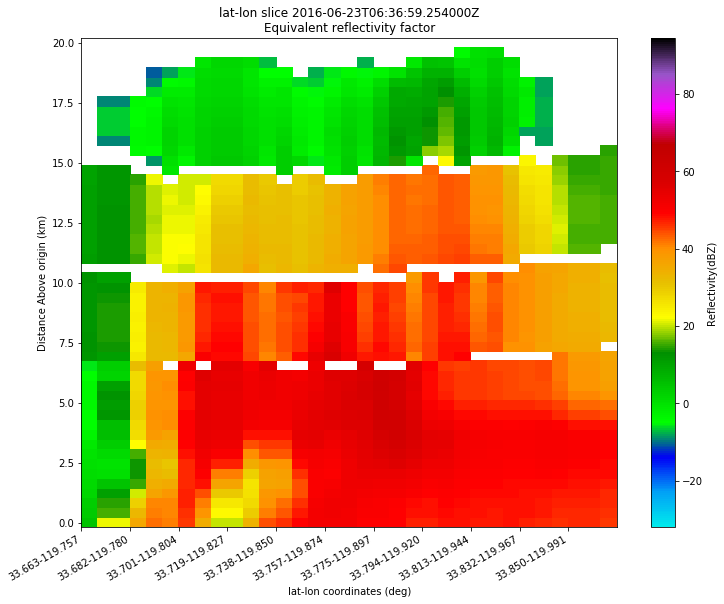

In [97]:
fig, ax = plt.subplots(figsize=(12, 9))

display.plot_latlon_slice('reflectivity', 
                          coord1=(119.7520, 33.6601), 
                          coord2=(120.0182, 33.8739), 
                          cmap='pyart_NWSRef'，
                          vmin=0,
                          vmaxa=70,
                         )

In [47]:
from pycwr.io.auto_io import radar_io

In [73]:
radar = radar_io(filename).ToPyartRadar()
radar.origin_latitude = {'data' : [32.5]}
radar.origin_longitude = {'data': [118.7]}

x = (-400000.0, 400000.0)
y = (-400000.0, 400000.0)
z = (100, 10000)
gshape = (20, 401, 401)
# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked(field)

grid = pyart.map.grid_from_radars((radar,),
                                  gatefilters=(gatefilter,),
                                  grid_shape=gshape,
                                  grid_limits=(z, y, x),
                                  fields=[field]
                                 )

display = GridMapDisplay(grid)

/Users/yanglee/.local/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:177: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


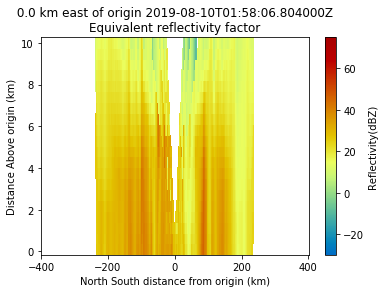

In [74]:
display.plot_longitude_slice('reflectivity')

In [62]:
x1, y1 = display._find_nearest_grid_indices(119.5, 33.5)
x2, y2 = display._find_nearest_grid_indices(118.5, 32.5)

In [63]:
print(x2, x1, y2, y1)

191 237 217 273


In [65]:
ind_1 = (x1, y1)
ind_2 = (x2, y2)

In [66]:
(display.grid.point_x['data'][0, 0, 1] -
                 display.grid.point_x['data'][0, 0, 0])

2000.0

In [67]:
(display.grid.point_y['data'][0, 1, 0] -
                 display.grid.point_y['data'][0, 0, 0])

2000.0

In [68]:
(display.grid.point_z['data'][1, 0, 0] -
                 display.grid.point_z['data'][0, 0, 0])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [71]:
display.grid.point_z['data']

(1, 401, 401)